# Features Exploration

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd

## (MFCCs + Deltas -> Normalize -> Pad) Features Exploration

### Load Metadata

In [5]:
mfcc_plus_deltas_metadata = pd.read_csv("../data/features/audio_16k/mfcc+deltas/metadata.csv")

### Pick a feature to visualize

In [21]:
feature = mfcc_plus_deltas_metadata.iloc[10000]
mfccs_plus_deltas = np.load(feature.file_path)
print(f"MFCC shape: {mfccs_plus_deltas.shape}")

MFCC shape: (1, 120, 150)


### Visualize

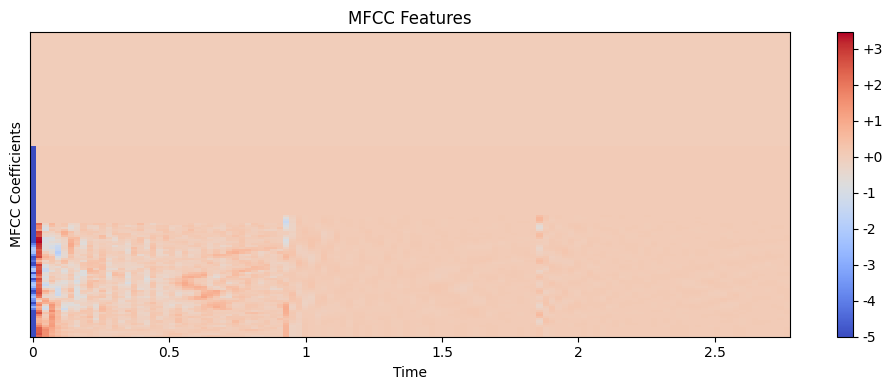

In [23]:
# Remove extra dimensions if needed
# If shape is (1, 120, 150), squeeze out the first dimension
if mfccs_plus_deltas.ndim == 3:
    mfccs_plus_deltas = mfccs_plus_deltas.squeeze()
    # Or specifically: mfccs_plus_deltas = mfccs_plus_deltas[0]

# If it's (120, 150), transpose to (150, 120) so features are on y-axis
if mfccs_plus_deltas.shape[0] < mfccs_plus_deltas.shape[1]:
    mfccs_plus_deltas = mfccs_plus_deltas.T

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs_plus_deltas, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC Features')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()